# Student#: 501177872
# Name: Shankar Ghimire
# Program: Data Analytics, Big Data, and Predictive Analytics

The dataset on ‘Energy and water usage of large buildings in Ontario’ provides comprehensive information on various aspects including property types, energy and water consumption, greenhouse gas emissions, and energy efficiency scores etc. The dataset contains 6,864 rows and 32 columns.
This research will explore the dataset and aims to find the following insights:
1. What are the key drivers of energy efficiency across different property types?
2. How do greenhouse gas (GHG) emissions vary by location and property type?
3. What is the relationship between water usage and energy consumption in large buildings?


DataSet Source URL:

https://data.ontario.ca/dataset/0eab2faf-6186-4a5b-8de1-b15872943c24/resource/f53db89b-d5e0-49ea-aa85-70453d969453/download/energy_large_building_energy_water_ghgs_2022.xlsx

Load dataset to Google Colab Notebook


In [443]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler        #Normalize the dataset
# Import StandardScaler
from sklearn.preprocessing import StandardScaler



In [286]:
from google.colab import files
uploaded = files.upload()

Saving energy_large_building_energy_water_ghgs_2022.xlsx to energy_large_building_energy_water_ghgs_2022 (2).xlsx


In [446]:
#Load Dataset
df = pd.read_excel('energy_large_building_energy_water_ghgs_2022.xlsx')


In [447]:
#print more records
df.head(15)

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,100036,Hawkesbury,K6A,Retail Store,Enclosed Mall,Retail Store,Retail Store,Not Available,1.646878,42.5,...,64.1,4.072633,105.1,53.819556,5.0,1,Not Available,Yes,2023-06-26,N
1,100037,Hawkesbury,K6A,Retail Store,Strip Mall,Retail Store,Retail Store,Not Available,0.643251,16.6,...,26.67,1.653466,42.67,23.680604,2.2,Not Available,Not Available,Yes,2023-06-27,N
2,100040,Hawkesbury,K6A,Retail Store,Retail Store,Retail Store,Retail Store,Not Available,0.430126,11.1,...,22.95,1.305878,33.7,24.756996,2.3,68,Not Available,No,Not Available,N
3,100066,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Not Available,0.682001,17.6,...,34.06,1.981679,51.14,33.368124,3.1,Not Available,Not Available,No,Not Available,N
4,100070,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,"Strip Mall , Parking",Not Available,0.426251,11,...,32.77,1.688728,43.58,41.979253,3.9,Not Available,Not Available,No,Not Available,N
5,100072,Rockland,K4K,Retail Store,Retail Store,Retail Store,Retail Store,Not Available,0.317751,8.2,...,12.49,0.791664,20.43,9.687520,0.9,96,Not Available,No,Not Available,N
6,100078,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Not Available,0.515376,13.3,...,85.43,3.906783,100.82,142.083627,13.2,Not Available,Not Available,No,Not Available,Y
7,100092,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Not Available,1.216753,31.4,...,39.86,2.715606,70.08,25.833387,2.4,Not Available,Not Available,No,Not Available,N
8,100099,Cornwall,K6H,Multifamily Housing,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",Not Available,0.418501,10.8,...,14.74,0.975727,25.18,10.763911,1.0,58,Not Available,No,Not Available,N
9,100101,Cornwall,K6H,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Matt Morris P. Eng.,1.015252,26.2,...,42.41,2.62338,67.7,38.750080,3.6,Not Available,Not Available,No,Not Available,N


Note: some of the records contains the 'Not Available' value to indicate the missing values in many attributes.
So, the datasetn requires data cleaning.

In [448]:
# print columns heading
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'PrimPropTypCalc', 'PrimPropTypSelf',
       'Largest_PropTyp', 'All_Prop_Types', 'Thrd_Party_Cert',
       'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Ener_Star_Certs',
       'Data_Qual_Check', 'Data_Qual_Date',
       'Calculated with new source factors (Y/N)'],
      dtype='object')

In [449]:
#Print datatype of each attribute/variable
df.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
PrimPropTypCalc,object
PrimPropTypSelf,object
Largest_PropTyp,object
All_Prop_Types,object
Thrd_Party_Cert,object
WN_Sit_Elc_Int1,object
WN_Sit_Elc_Int2,object


In [450]:
#Checking dataset contains any duplicate records or not i.e. matching entire row
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)
# Check if there are any duplicate rows
if not duplicate_rows.empty:
    print("The dataset contains duplicate records.")
else:
    print("The dataset does not contain any duplicate records.")

Empty DataFrame
Columns: [EWRB_ID, City, Postal_Code, PrimPropTypCalc, PrimPropTypSelf, Largest_PropTyp, All_Prop_Types, Thrd_Party_Cert, WN_Sit_Elc_Int1, WN_Sit_Elc_Int2, WN_Sit_Gas_Int1, WN_Sit_Gas_Int2, WN_Sit_Gas_Int3, All_Water_Int1, All_Water_Int2, Ind_Water_Int1, Ind_Water_Int2, Site_EUI1, Site_EUI2, Source_EUI1, Source_EUI2, WN_Site_EUI1, WN_Site_EUI2, WN_Source_EUI1, WN_Source_EUI2, GHG_Emiss_Int1, GHG_Emiss_Int2, Ener_Star_Score, Ener_Star_Certs, Data_Qual_Check, Data_Qual_Date, Calculated with new source factors (Y/N)]
Index: []

[0 rows x 32 columns]
The dataset does not contain any duplicate records.


In [451]:
# list of numeric attributes
# From the data dictionary file info:
# ontario_large_building_energy_water_ghgs_data_dictionary.xlsx

numeric_attributes = ['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1',
       'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1',
       'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1',
       'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score']

#list of category attributs
category_attributes  = ['PrimPropTypCalc','PrimPropTypSelf','Largest_PropTyp','All_Prop_Types','Data_Qual_Check', 'Calculated with new source factors (Y/N)']

#list of datetime attributes
datetime_attributes = ['Data_Qual_Date']

print("Numeric Attributes:")
print(numeric_attributes)
print("Categorical Attributes:")
print(category_attributes)
print("DateTime Attributes:")
print(category_attributes)


Numeric Attributes:
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
Categorical Attributes:
['PrimPropTypCalc', 'PrimPropTypSelf', 'Largest_PropTyp', 'All_Prop_Types', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']
DateTime Attributes:
['PrimPropTypCalc', 'PrimPropTypSelf', 'Largest_PropTyp', 'All_Prop_Types', 'Data_Qual_Check', 'Calculated with new source factors (Y/N)']


In [452]:
#To replace 'Not Available' values with NaN in numerical columns
# Replace 'Not Available' with blank (empty string) across specified columns
df.replace('Not Available', pd.NA, inplace=True)
df.head(15)


,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,100036,Hawkesbury,K6A,Retail Store,Enclosed Mall,Retail Store,Retail Store,<NA>,1.646878,42.5,...,64.1,4.072633,105.1,53.819556,5.0,1,<NA>,Yes,2023-06-26,N
1,100037,Hawkesbury,K6A,Retail Store,Strip Mall,Retail Store,Retail Store,<NA>,0.643251,16.6,...,26.67,1.653466,42.67,23.680604,2.2,<NA>,<NA>,Yes,2023-06-27,N
2,100040,Hawkesbury,K6A,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.430126,11.1,...,22.95,1.305878,33.7,24.756996,2.3,68,<NA>,No,<NA>,N
3,100066,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,Strip Mall,<NA>,0.682001,17.6,...,34.06,1.981679,51.14,33.368124,3.1,<NA>,<NA>,No,<NA>,N
4,100070,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,"Strip Mall , Parking",<NA>,0.426251,11,...,32.77,1.688728,43.58,41.979253,3.9,<NA>,<NA>,No,<NA>,N
5,100072,Rockland,K4K,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.317751,8.2,...,12.49,0.791664,20.43,9.687520,0.9,96,<NA>,No,<NA>,N
6,100078,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,0.515376,13.3,...,85.43,3.906783,100.82,142.083627,13.2,<NA>,<NA>,No,<NA>,Y
7,100092,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,1.216753,31.4,...,39.86,2.715606,70.08,25.833387,2.4,<NA>,<NA>,No,<NA>,N
8,100099,Cornwall,K6H,Multifamily Housing,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",<NA>,0.418501,10.8,...,14.74,0.975727,25.18,10.763911,1.0,58,<NA>,No,<NA>,N
9,100101,Cornwall,K6H,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Matt Morris P. Eng.,1.015252,26.2,...,42.41,2.62338,67.7,38.750080,3.6,<NA>,<NA>,No,<NA>,N


In [453]:
#Print datatype of each attribute/variable
df.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
PrimPropTypCalc,object
PrimPropTypSelf,object
Largest_PropTyp,object
All_Prop_Types,object
Thrd_Party_Cert,object
WN_Sit_Elc_Int1,object
WN_Sit_Elc_Int2,object


In [454]:
# still some numeric attributes are shown as 'object' data type
# Converting those into numerica atributes
df[numeric_attributes] = df[numeric_attributes].apply(pd.to_numeric, errors='coerce')

In [455]:
# List of columns to convert from Object into category
# Convert specified columns to cagegory
df[category_attributes] = df[category_attributes].astype('category')

In [456]:
# List of columns to convert from Object into datetime
# Convert to datetime
df['Data_Qual_Date'] = pd.to_datetime(df['Data_Qual_Date'], errors='coerce')



In [457]:
#print datatype
df.dtypes

,0
EWRB_ID,int64
City,object
Postal_Code,object
PrimPropTypCalc,category
PrimPropTypSelf,category
Largest_PropTyp,category
All_Prop_Types,category
Thrd_Party_Cert,object
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64


In [458]:
# check the missing values in each column

df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
PrimPropTypCalc,5
PrimPropTypSelf,0
Largest_PropTyp,5
All_Prop_Types,0
Thrd_Party_Cert,6721
WN_Sit_Elc_Int1,442
WN_Sit_Elc_Int2,442


In [459]:
#Handling Missing values in numeric attributes
# replacing missing values by the mean of the column
df[numeric_attributes] = df[numeric_attributes].apply(lambda col: col.fillna(col.mean()))
df.head(15)


,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,100036,Hawkesbury,K6A,Retail Store,Enclosed Mall,Retail Store,Retail Store,<NA>,1.646878,42.500000,...,64.100000,4.072633,105.100000,53.819556,5.0,1.000000,<NA>,Yes,2023-06-26,N
1,100037,Hawkesbury,K6A,Retail Store,Strip Mall,Retail Store,Retail Store,<NA>,0.643251,16.600000,...,26.670000,1.653466,42.670000,23.680604,2.2,53.424766,<NA>,Yes,2023-06-27,N
2,100040,Hawkesbury,K6A,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.430126,11.100000,...,22.950000,1.305878,33.700000,24.756996,2.3,68.000000,<NA>,No,NaT,N
3,100066,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,Strip Mall,<NA>,0.682001,17.600000,...,34.060000,1.981679,51.140000,33.368124,3.1,53.424766,<NA>,No,NaT,N
4,100070,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,"Strip Mall , Parking",<NA>,0.426251,11.000000,...,32.770000,1.688728,43.580000,41.979253,3.9,53.424766,<NA>,No,NaT,N
5,100072,Rockland,K4K,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.317751,8.200000,...,12.490000,0.791664,20.430000,9.687520,0.9,96.000000,<NA>,No,NaT,N
6,100078,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,0.515376,13.300000,...,85.430000,3.906783,100.820000,142.083627,13.2,53.424766,<NA>,No,NaT,Y
7,100092,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,1.216753,31.400000,...,39.860000,2.715606,70.080000,25.833387,2.4,53.424766,<NA>,No,NaT,N
8,100099,Cornwall,K6H,Multifamily Housing,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",<NA>,0.418501,10.800000,...,14.740000,0.975727,25.180000,10.763911,1.0,58.000000,<NA>,No,NaT,N
9,100101,Cornwall,K6H,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Matt Morris P. Eng.,1.015252,26.200000,...,42.410000,2.623380,67.700000,38.750080,3.6,53.424766,<NA>,No,NaT,N


In [460]:
#Handling Missing values in Categorical attributes
# Replace missing values with the mode for these specific columns
for col in category_attributes:
    mode_value = df[col].mode()[0]  # Get the mode (most frequent value)
    df[col] = df[col].fillna(mode_value)

In [461]:
#Handling missing values in the datetime attribute
# replacing the missing date value using the Backward fill
df['Data_Qual_Date'] = df['Data_Qual_Date'].fillna(method='bfill')


<ipython-input-461-c7108108333e>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Data_Qual_Date'] = df['Data_Qual_Date'].fillna(method='bfill')


In [462]:
df.head(15)

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Thrd_Party_Cert,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,...,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Ener_Star_Certs,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,100036,Hawkesbury,K6A,Retail Store,Enclosed Mall,Retail Store,Retail Store,<NA>,1.646878,42.500000,...,64.100000,4.072633,105.100000,53.819556,5.0,1.000000,<NA>,Yes,2023-06-26,N
1,100037,Hawkesbury,K6A,Retail Store,Strip Mall,Retail Store,Retail Store,<NA>,0.643251,16.600000,...,26.670000,1.653466,42.670000,23.680604,2.2,53.424766,<NA>,Yes,2023-06-27,N
2,100040,Hawkesbury,K6A,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.430126,11.100000,...,22.950000,1.305878,33.700000,24.756996,2.3,68.000000,<NA>,No,2023-10-01,N
3,100066,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,Strip Mall,<NA>,0.682001,17.600000,...,34.060000,1.981679,51.140000,33.368124,3.1,53.424766,<NA>,No,2023-10-01,N
4,100070,Rockland,K4K,Strip Mall,Strip Mall,Strip Mall,"Strip Mall , Parking",<NA>,0.426251,11.000000,...,32.770000,1.688728,43.580000,41.979253,3.9,53.424766,<NA>,No,2023-10-01,N
5,100072,Rockland,K4K,Retail Store,Retail Store,Retail Store,Retail Store,<NA>,0.317751,8.200000,...,12.490000,0.791664,20.430000,9.687520,0.9,96.000000,<NA>,No,2023-10-01,N
6,100078,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,0.515376,13.300000,...,85.430000,3.906783,100.820000,142.083627,13.2,53.424766,<NA>,No,2023-10-01,Y
7,100092,Cornwall,K6H,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,Manufacturing/Industrial Plant,<NA>,1.216753,31.400000,...,39.860000,2.715606,70.080000,25.833387,2.4,53.424766,<NA>,No,2023-10-01,N
8,100099,Cornwall,K6H,Multifamily Housing,Multifamily Housing,Multifamily Housing,"Multifamily Housing, Parking",<NA>,0.418501,10.800000,...,14.740000,0.975727,25.180000,10.763911,1.0,58.000000,<NA>,No,2023-10-01,N
9,100101,Cornwall,K6H,Strip Mall,Strip Mall,Strip Mall,Strip Mall,Matt Morris P. Eng.,1.015252,26.200000,...,42.410000,2.623380,67.700000,38.750080,3.6,53.424766,<NA>,No,2023-10-01,N


In [463]:
# check the missing values in each column
df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
PrimPropTypCalc,0
PrimPropTypSelf,0
Largest_PropTyp,0
All_Prop_Types,0
Thrd_Party_Cert,6721
WN_Sit_Elc_Int1,0
WN_Sit_Elc_Int2,0


In [464]:
# Attributes 'Thrd_Party_Cert' and 'Ener_Star_Certs' contain the nominal data in the dataset
# and having large number of missing values
# So, dropping these two attributes instead of handling the missing values
df.drop(['Thrd_Party_Cert', 'Ener_Star_Certs'], axis=1, inplace=True)
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'PrimPropTypCalc', 'PrimPropTypSelf',
       'Largest_PropTyp', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Data_Qual_Date',
       'Calculated with new source factors (Y/N)'],
      dtype='object')

In [465]:
# encode each categorical attribute into numerical values so that later Machine Learning algorithms don't have any issues

# Encode categorical attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in category_attributes:
    df[col] = le.fit_transform(df[col])

df.head(15)

,EWRB_ID,City,Postal_Code,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Data_Qual_Date,Calculated with new source factors (Y/N)
0,100036,Hawkesbury,K6A,41,4,40,305,1.646878,42.500000,0.794764,...,2.483880,64.100000,4.072633,105.100000,53.819556,5.0,1.000000,1,2023-06-26,0
1,100037,Hawkesbury,K6A,41,46,40,305,0.643251,16.600000,0.340613,...,1.033465,26.670000,1.653466,42.670000,23.680604,2.2,53.424766,1,2023-06-27,0
2,100040,Hawkesbury,K6A,41,41,40,305,0.430126,11.100000,0.454151,...,0.889314,22.950000,1.305878,33.700000,24.756996,2.3,68.000000,0,2023-10-01,0
3,100066,Rockland,K4K,46,46,45,316,0.682001,17.600000,0.681226,...,1.319828,34.060000,1.981679,51.140000,33.368124,3.1,53.424766,0,2023-10-01,0
4,100070,Rockland,K4K,46,46,45,333,0.426251,11.000000,0.794764,...,1.269840,32.770000,1.688728,43.580000,41.979253,3.9,53.424766,0,2023-10-01,0
5,100072,Rockland,K4K,41,41,40,305,0.317751,8.200000,0.113538,...,0.483988,12.490000,0.791664,20.430000,9.687520,0.9,96.000000,0,2023-10-01,0
6,100078,Cornwall,K6H,15,16,15,81,0.515376,13.300000,2.838443,...,3.310419,85.430000,3.906783,100.820000,142.083627,13.2,53.424766,0,2023-10-01,1
7,100092,Cornwall,K6H,15,16,15,81,1.216753,31.400000,0.340613,...,1.544578,39.860000,2.715606,70.080000,25.833387,2.4,53.424766,0,2023-10-01,0
8,100099,Cornwall,K6H,19,20,18,0,0.418501,10.800000,0.113538,...,0.571176,14.740000,0.975727,25.180000,10.763911,1.0,58.000000,0,2023-10-01,0
9,100101,Cornwall,K6H,46,46,45,316,1.015252,26.200000,0.681226,...,1.643391,42.410000,2.623380,67.700000,38.750080,3.6,53.424766,0,2023-10-01,0


In [466]:
# prompt: Convert date into timestamp

import pandas as pd

# Assuming 'df' is your DataFrame and 'Data_Qual_Date' is the column with dates
# Convert 'Data_Qual_Date' to datetime objects if it's not already
df['Data_Qual_Date'] = pd.to_datetime(df['Data_Qual_Date'])

# Convert to timestamp (Unix epoch time in seconds)
df['Timestamp'] = df['Data_Qual_Date'].astype('int64') // 10**9

print(df[['Data_Qual_Date', 'Timestamp']].head())

  Data_Qual_Date   Timestamp
0     2023-06-26  1687737600
1     2023-06-27  1687824000
2     2023-10-01  1696118400
3     2023-10-01  1696118400
4     2023-10-01  1696118400


In [467]:
# prompt: drop Data_Qual_date from the dataset

# Assuming 'df' is your DataFrame and 'Data_Qual_Date' is the column you want to drop
df = df.drop('Data_Qual_Date', axis=1)

In [468]:
#print columns
df.columns

Index(['EWRB_ID', 'City', 'Postal_Code', 'PrimPropTypCalc', 'PrimPropTypSelf',
       'Largest_PropTyp', 'All_Prop_Types', 'WN_Sit_Elc_Int1',
       'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2',
       'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1',
       'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1',
       'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1',
       'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score',
       'Data_Qual_Check', 'Calculated with new source factors (Y/N)',
       'Timestamp'],
      dtype='object')

In [469]:
# check the missing values in each column
df.isnull().sum()

,0
EWRB_ID,0
City,0
Postal_Code,0
PrimPropTypCalc,0
PrimPropTypSelf,0
Largest_PropTyp,0
All_Prop_Types,0
WN_Sit_Elc_Int1,0
WN_Sit_Elc_Int2,0
WN_Sit_Gas_Int1,0


In [470]:
#drop columns City and Postal_Code from the dataframe

# Drop columns 'City' and 'Postal_Code'
df.drop(['City', 'Postal_Code'], axis=1, inplace=True)
df.columns

Index(['EWRB_ID', 'PrimPropTypCalc', 'PrimPropTypSelf', 'Largest_PropTyp',
       'All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2',
       'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3',
       'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2',
       'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Data_Qual_Check',
       'Calculated with new source factors (Y/N)', 'Timestamp'],
      dtype='object')

In [471]:
df.dtypes

,0
EWRB_ID,int64
PrimPropTypCalc,int64
PrimPropTypSelf,int64
Largest_PropTyp,int64
All_Prop_Types,int64
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64


In [472]:
# statistical summary of numeric attributes
statistical_summary = df[numeric_attributes].describe()
statistical_summary

,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,All_Water_Int1,All_Water_Int2,Ind_Water_Int1,Ind_Water_Int2,Site_EUI1,Site_EUI2,Source_EUI1,Source_EUI2,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,0.432220,11.154049,0.721659,19.347429,1.797435,7.384968,0.686086,1.414857,1.414857,3.046287,78.613708,3.722794,96.071896,1.530658,39.500776,2.115864,54.602819,127.502949,11.845411,53.424766
std,0.576274,14.871565,2.580018,69.169380,6.426045,214.344317,19.913237,19.386984,19.386984,125.159115,3229.905971,134.529148,3471.712777,28.051603,723.910835,37.340117,963.613929,6377.020709,592.444572,25.011320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.197625,5.100000,0.340613,9.131721,0.848365,0.326275,0.030312,0.139891,0.139891,0.611961,15.792500,0.848239,21.890000,0.639376,16.500000,0.884664,22.830000,17.222258,1.600000,42.000000
50%,0.313876,8.100000,0.567689,15.219535,1.413941,0.945311,0.087822,1.414857,1.414857,0.833514,21.510000,1.134021,29.265000,0.874589,22.570000,1.189240,30.690000,25.833387,2.400000,53.424766
75%,0.445626,11.500000,0.721659,19.347429,1.797435,1.675991,0.155705,1.414857,1.414857,1.115518,28.787500,1.546903,39.920000,1.246978,32.180000,1.723410,44.475000,37.673689,3.500000,69.000000
max,18.607788,480.200000,97.756377,2620.814391,243.481609,13788.335021,1280.978158,1280.978158,1280.978158,10113.624400,260996.220000,10720.754840,276664.070000,1756.900339,45339.270000,2339.960780,60385.960000,508441.952202,47235.800000,100.000000


In [473]:
#statistical summary of categorical attribute
categorical_summary = df[category_attributes].describe()
categorical_summary

,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,Data_Qual_Check,Calculated with new source factors (Y/N)
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000
mean,22.062937,21.931381,21.242133,125.005973,0.529429,0.230915
std,10.017418,9.916706,9.874158,100.372582,0.499170,0.421449
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,20.000000,18.000000,66.000000,0.000000,0.000000
50%,19.000000,20.000000,18.000000,92.000000,1.000000,0.000000
75%,22.000000,23.000000,21.000000,204.250000,1.000000,0.000000
max,51.000000,51.000000,50.000000,352.000000,1.000000,1.000000


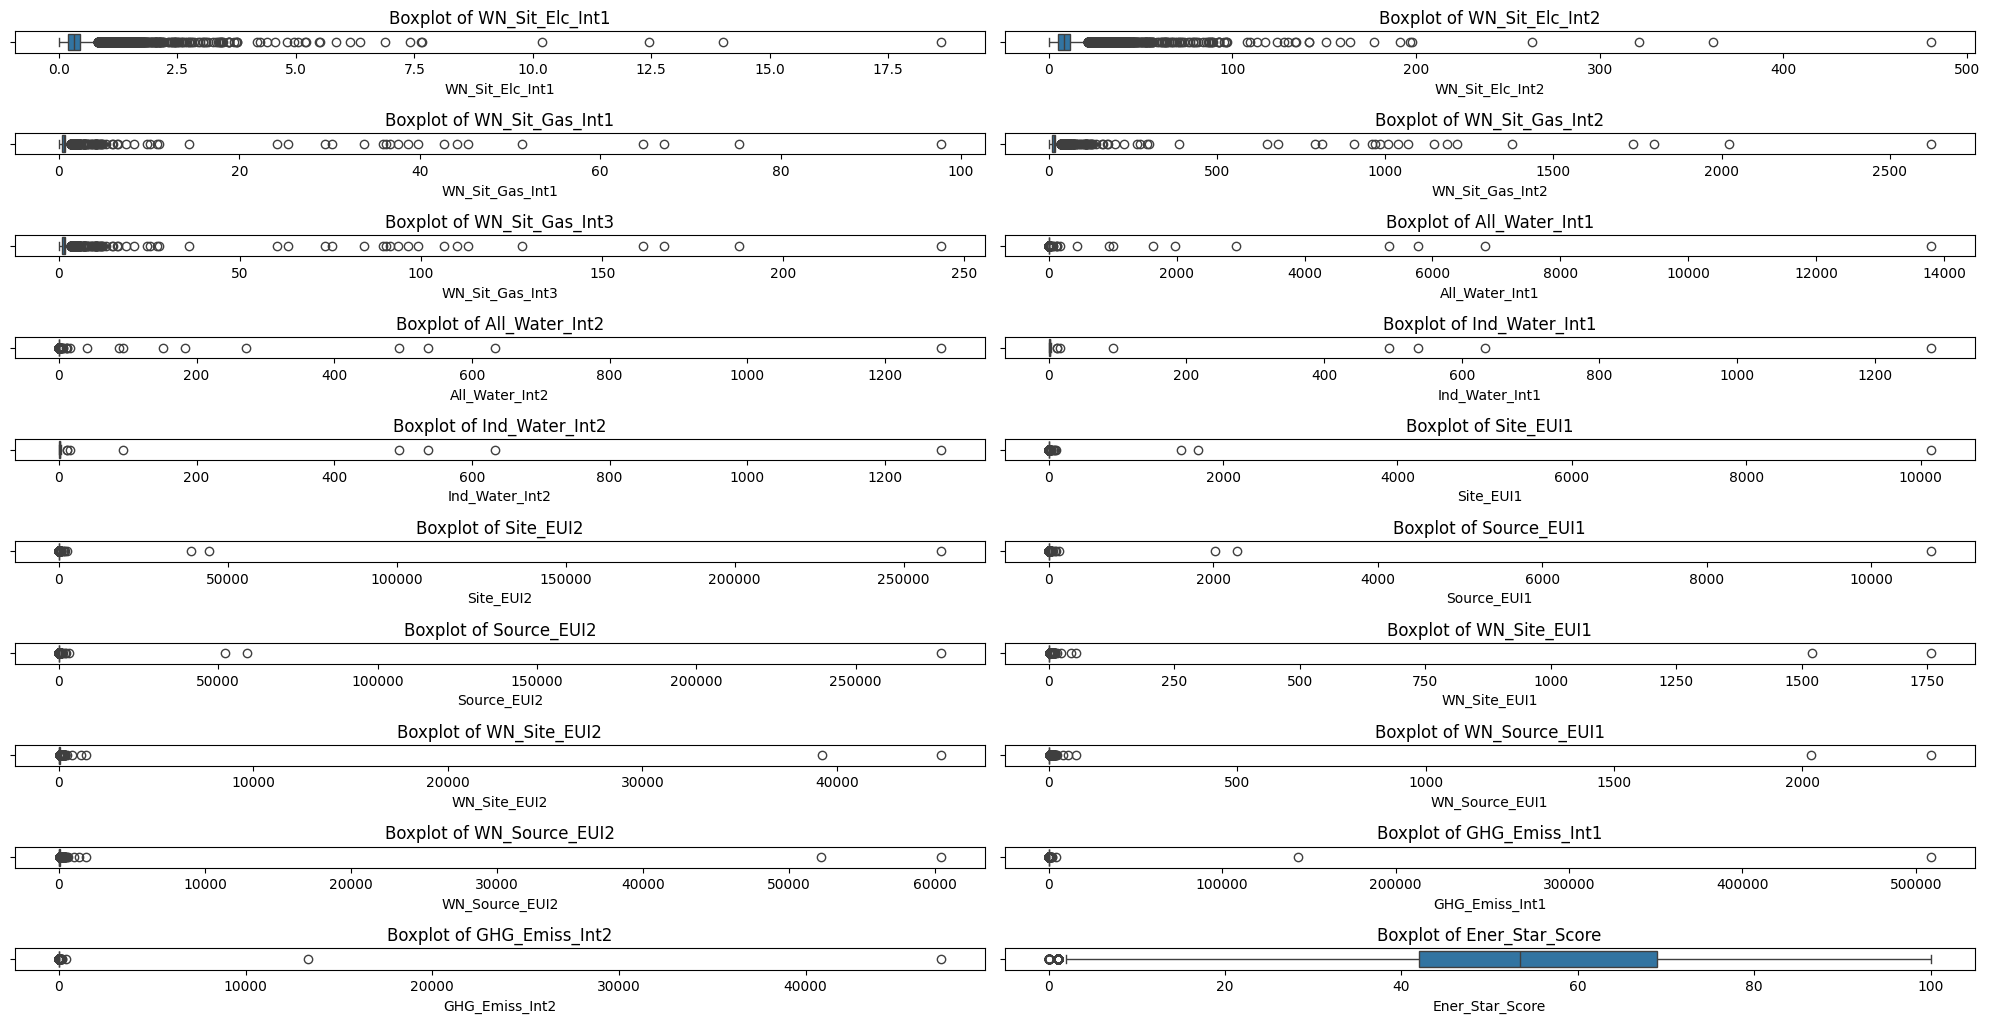

In [474]:
# Find out any outliers in the dataset
# Select numeric columns only for plotting
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Create boxplots for each numeric column
plt.figure(figsize=(20, 15))
#for i, col in enumerate(numeric_columns, 1):
for i, col in enumerate(numeric_attributes, 1):
    #plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

In [476]:
print(numeric_attributes)
col_list_1 = numeric_attributes[:5]
col_list_2 = numeric_attributes[5:10]
col_list_3 = numeric_attributes[10:]
print(col_list_1)
print(col_list_2)
print(col_list_3)


['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3', 'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']
['WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2', 'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3']
['All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2', 'Site_EUI1']
['Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1', 'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1', 'GHG_Emiss_Int2', 'Ener_Star_Score']


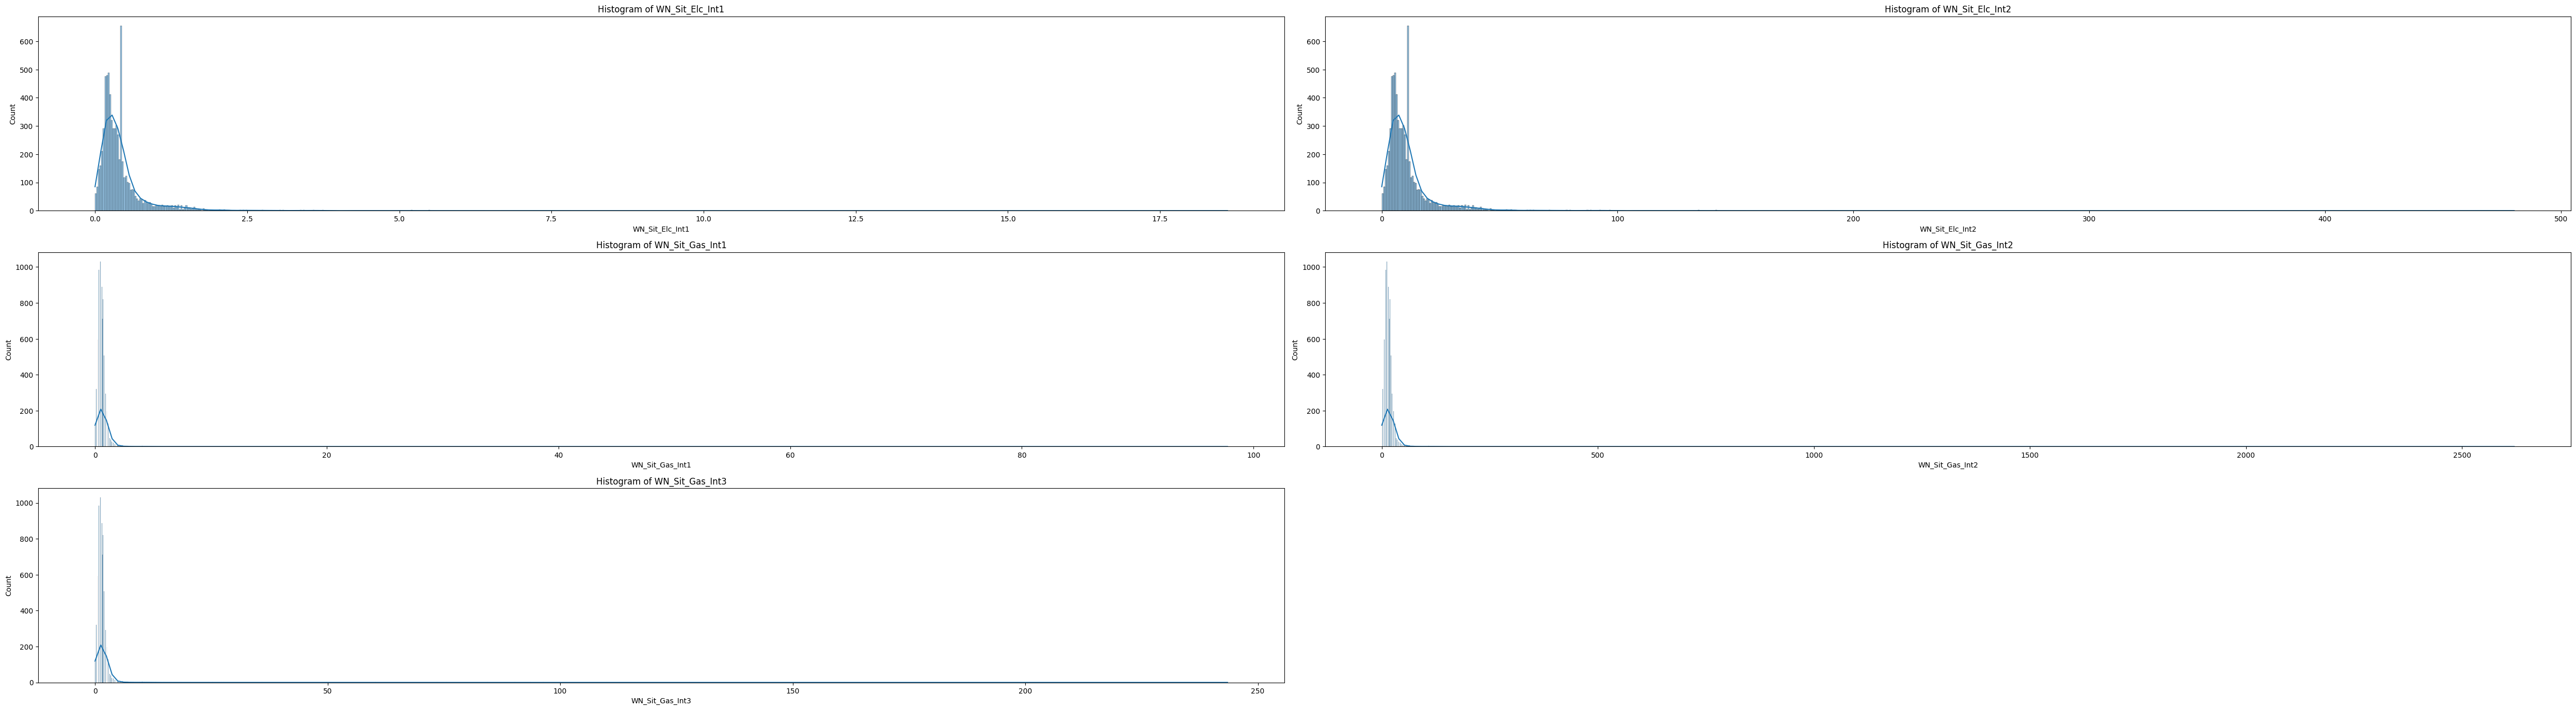

In [477]:


# show the histogram
plt.figure(figsize=(50, 50))
for i, col in enumerate(col_list_1, 1):
    plt.subplot(len(numeric_attributes) // 2 + 1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()


In [398]:
#copy dataframe df into temp
df_temp = df.copy()


Normalization of Numeric Attributes

In [478]:
#copy dataframe df into temp
df_temp_normalized = df_temp.copy()
# Normalize numeric attributes using MinMaxScaler
scaler = MinMaxScaler()
df_temp_normalized[numeric_attributes] = scaler.fit_transform(df_temp_normalized[numeric_attributes])
#df_temp_normalized.head(15)
#df_temp_normalized.columns
df_temp_normalized.dtypes


,0
EWRB_ID,int64
PrimPropTypCalc,int64
PrimPropTypSelf,int64
Largest_PropTyp,int64
All_Prop_Types,int64
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64


In [479]:
df_temp_normalized.head(15)
#df_temp_normalized.drop(['Data_Qual_Date'], axis=1, inplace=True)


,EWRB_ID,PrimPropTypCalc,PrimPropTypSelf,Largest_PropTyp,All_Prop_Types,WN_Sit_Elc_Int1,WN_Sit_Elc_Int2,WN_Sit_Gas_Int1,WN_Sit_Gas_Int2,WN_Sit_Gas_Int3,...,WN_Site_EUI1,WN_Site_EUI2,WN_Source_EUI1,WN_Source_EUI2,GHG_Emiss_Int1,GHG_Emiss_Int2,Ener_Star_Score,Data_Qual_Check,Calculated with new source factors (Y/N),Timestamp
0,100036,41,4,40,305,0.088505,0.088505,0.008130,0.008130,0.008130,...,0.001414,0.001414,0.001740,0.001740,0.000106,0.000106,0.010000,1,0,1687737600
1,100037,41,46,40,305,0.034569,0.034569,0.003484,0.003484,0.003484,...,0.000588,0.000588,0.000707,0.000707,0.000047,0.000047,0.534248,1,0,1687824000
2,100040,41,41,40,305,0.023115,0.023115,0.004646,0.004646,0.004646,...,0.000506,0.000506,0.000558,0.000558,0.000049,0.000049,0.680000,0,0,1696118400
3,100066,46,46,45,316,0.036651,0.036651,0.006969,0.006969,0.006969,...,0.000751,0.000751,0.000847,0.000847,0.000066,0.000066,0.534248,0,0,1696118400
4,100070,46,46,45,333,0.022907,0.022907,0.008130,0.008130,0.008130,...,0.000723,0.000723,0.000722,0.000722,0.000083,0.000083,0.534248,0,0,1696118400
5,100072,41,41,40,305,0.017076,0.017076,0.001161,0.001161,0.001161,...,0.000275,0.000275,0.000338,0.000338,0.000019,0.000019,0.960000,0,0,1696118400
6,100078,15,16,15,81,0.027697,0.027697,0.029036,0.029036,0.029036,...,0.001884,0.001884,0.001670,0.001670,0.000279,0.000279,0.534248,0,1,1696118400
7,100092,15,16,15,81,0.065389,0.065389,0.003484,0.003484,0.003484,...,0.000879,0.000879,0.001161,0.001161,0.000051,0.000051,0.534248,0,0,1696118400
8,100099,19,20,18,0,0.022491,0.022491,0.001161,0.001161,0.001161,...,0.000325,0.000325,0.000417,0.000417,0.000021,0.000021,0.580000,0,0,1696118400
9,100101,46,46,45,316,0.054561,0.054561,0.006969,0.006969,0.006969,...,0.000935,0.000935,0.001121,0.001121,0.000076,0.000076,0.534248,0,0,1696118400


In [480]:
df_temp_normalized.columns


Index(['EWRB_ID', 'PrimPropTypCalc', 'PrimPropTypSelf', 'Largest_PropTyp',
       'All_Prop_Types', 'WN_Sit_Elc_Int1', 'WN_Sit_Elc_Int2',
       'WN_Sit_Gas_Int1', 'WN_Sit_Gas_Int2', 'WN_Sit_Gas_Int3',
       'All_Water_Int1', 'All_Water_Int2', 'Ind_Water_Int1', 'Ind_Water_Int2',
       'Site_EUI1', 'Site_EUI2', 'Source_EUI1', 'Source_EUI2', 'WN_Site_EUI1',
       'WN_Site_EUI2', 'WN_Source_EUI1', 'WN_Source_EUI2', 'GHG_Emiss_Int1',
       'GHG_Emiss_Int2', 'Ener_Star_Score', 'Data_Qual_Check',
       'Calculated with new source factors (Y/N)', 'Timestamp'],
      dtype='object')

In [481]:
df_temp_normalized.dtypes

,0
EWRB_ID,int64
PrimPropTypCalc,int64
PrimPropTypSelf,int64
Largest_PropTyp,int64
All_Prop_Types,int64
WN_Sit_Elc_Int1,float64
WN_Sit_Elc_Int2,float64
WN_Sit_Gas_Int1,float64
WN_Sit_Gas_Int2,float64
WN_Sit_Gas_Int3,float64


In [482]:
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate correlations for specific columns
selected_columns = ['PrimPropTypCalc', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1']
correlation_matrix = df_temp_normalized[selected_columns].corr()
# Display the correlation matrix
correlation_matrix



,PrimPropTypCalc,WN_Sit_Elc_Int1,WN_Sit_Gas_Int1,All_Water_Int1,GHG_Emiss_Int1
PrimPropTypCalc,1.000000,0.166229,-0.004100,-0.032498,-0.008051
WN_Sit_Elc_Int1,0.166229,1.000000,0.185877,0.006430,0.030296
WN_Sit_Gas_Int1,-0.004100,0.185877,1.000000,0.000345,0.001073
All_Water_Int1,-0.032498,0.006430,0.000345,1.000000,-0.000490
GHG_Emiss_Int1,-0.008051,0.030296,0.001073,-0.000490,1.000000


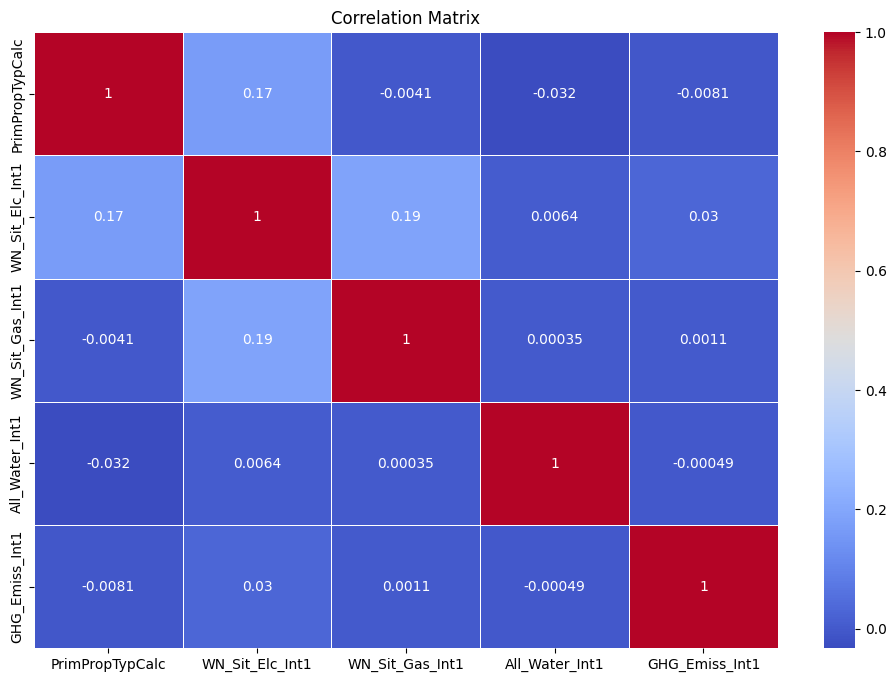

In [404]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#copy dataframe df into temp
#df_temp_std = df_temp.copy()
#df_temp_std.head(15)

In [ ]:
# prompt: standardize the numeric attributes of dataframe df_temp_std

# Standardize numeric attributes using StandardScaler
#scaler = StandardScaler()
#df_temp_std[numeric_attributes] = scaler.fit_transform(df_temp_std[numeric_attributes])

#df_temp_std.head(15)

In [ ]:
#df_temp_normalized.head(15)

Decision Tree Algorithm for the research question.
What are the key drivers of energy efficiency across different property types?

Mean Squared Error: 0.027872737666606476
Feature: EWRB_ID, Importance: 0.029978306601728472
Feature: PrimPropTypCalc, Importance: 0.01074684880218142
Feature: PrimPropTypSelf, Importance: 0.07199136940482304
Feature: Largest_PropTyp, Importance: 0.08226934233707811
Feature: All_Prop_Types, Importance: 0.1200141968537972
Feature: WN_Sit_Elc_Int1, Importance: 0.014235727093613695
Feature: WN_Sit_Elc_Int2, Importance: 0.009223130158407852
Feature: WN_Sit_Gas_Int1, Importance: 0.001895679357224266
Feature: WN_Sit_Gas_Int2, Importance: 0.001837055955904903
Feature: WN_Sit_Gas_Int3, Importance: 0.002011186237914926
Feature: All_Water_Int1, Importance: 0.023614859758454832
Feature: All_Water_Int2, Importance: 0.014142687717114511
Feature: Ind_Water_Int1, Importance: 0.018670760420356074
Feature: Ind_Water_Int2, Importance: 0.011423875999547892
Feature: Site_EUI1, Importance: 0.33485296040564483
Feature: Site_EUI2, Importance: 0.011161184212116718
Feature: Source_EUI1, Importance: 0.0700489946

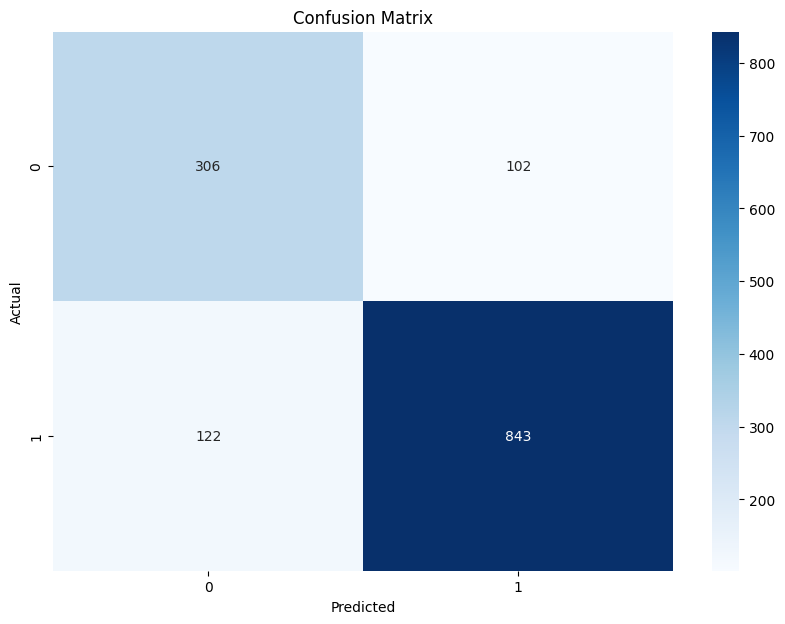

In [483]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
#from sklearn.tree import plot_tree


# Select relevant features and the target variable
features = ['PrimPropTypCalc', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1']
target = 'Ener_Star_Score'

X = df_temp_normalized.drop(columns=[target])
y = df_temp_normalized[target]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')

# Convert predictions and actual values to discrete classes
y_pred_class = y_pred.round().astype(int)
y_test_class = y_test.round().astype(int)

# Calculate accuracy, precision, and recall for each model
accuracy_dt = accuracy_score(y_test_class, y_pred_class)
precision_dt = precision_score(y_test_class, y_pred_class, average='weighted')
recall_dt = recall_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print()
# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the Decision Tree
#plt.figure(figsize=(20,10))
#plot_tree(model, feature_names=X.columns, filled=True)
#plt.show()


Linear Regression Modelfor the research question. What are the key drivers of energy efficiency across different property types?


Mean Squared Error: 0.058806830934564555
Intercept: 0.5370553798554577
Feature: PrimPropTypCalc, Coefficient: 0.001505969559949691
Feature: WN_Sit_Elc_Int1, Coefficient: -1.4358262578153154
Feature: WN_Sit_Gas_Int1, Coefficient: -0.22247341025545045
Feature: All_Water_Int1, Coefficient: 0.046427518562102456
Feature: GHG_Emiss_Int1, Coefficient: -0.05191315652038008
Accuracy: 0.6817188638018936
Precision: 0.6009945241749043
Recall: 0.6817188638018936

Confusion Matrix:
[[ 34 374]
 [ 63 902]]


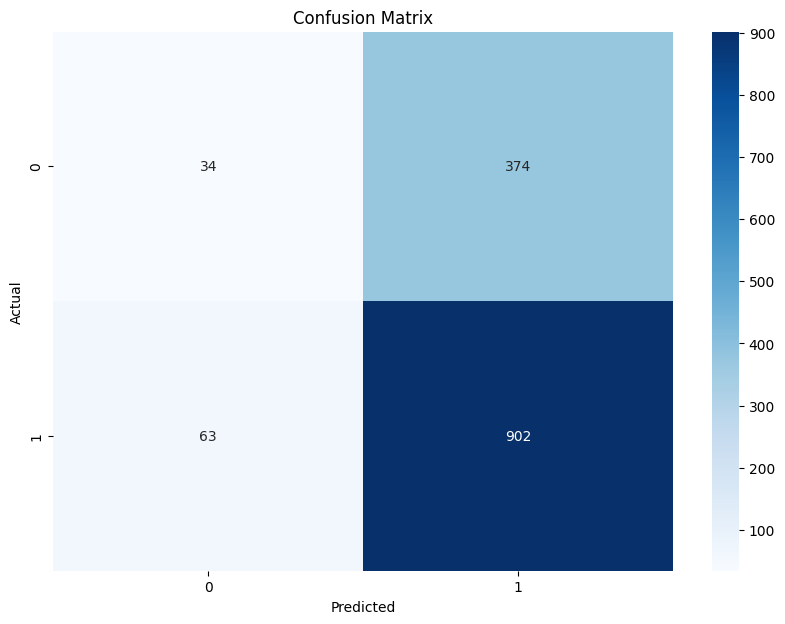

In [484]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix , ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Select relevant features and the target variable
features = ['PrimPropTypCalc', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1']
target = 'Ener_Star_Score'

# Define the target variable and features
X = df_temp_normalized[features]
y = df_temp_normalized[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients of the linear regression model
coefficients = model.coef_
intercept = model.intercept_
print(f"Intercept: {intercept}")
for feature, coef in zip(features, coefficients):
    print(f"Feature: {feature}, Coefficient: {coef}")

# Convert predictions and actual values to discrete classes
y_pred_class = y_pred.round().astype(int)
y_test_class = y_test.round().astype(int)

# Calculate accuracy, precision, and recall for each model
accuracy_dt = accuracy_score(y_test_class, y_pred_class)
precision_dt = precision_score(y_test_class, y_pred_class, average='weighted')
recall_dt = recall_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print()

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Regression Modelfor the research question. What are the key drivers of energy efficiency across different property types?

Mean Squared Error: 0.021276044537516865
Feature: PrimPropTypCalc, Importance: 0.23102736877836574
Feature: WN_Sit_Elc_Int1, Importance: 0.23451785039531056
Feature: WN_Sit_Gas_Int1, Importance: 0.029425134745544295
Feature: All_Water_Int1, Importance: 0.13187456748727835
Feature: GHG_Emiss_Int1, Importance: 0.373155078593501
Accuracy: 0.8404952658412236
Precision: 0.853987055773362
Recall: 0.8404952658412236

Confusion Matrix:
[[339  69]
 [150 815]]


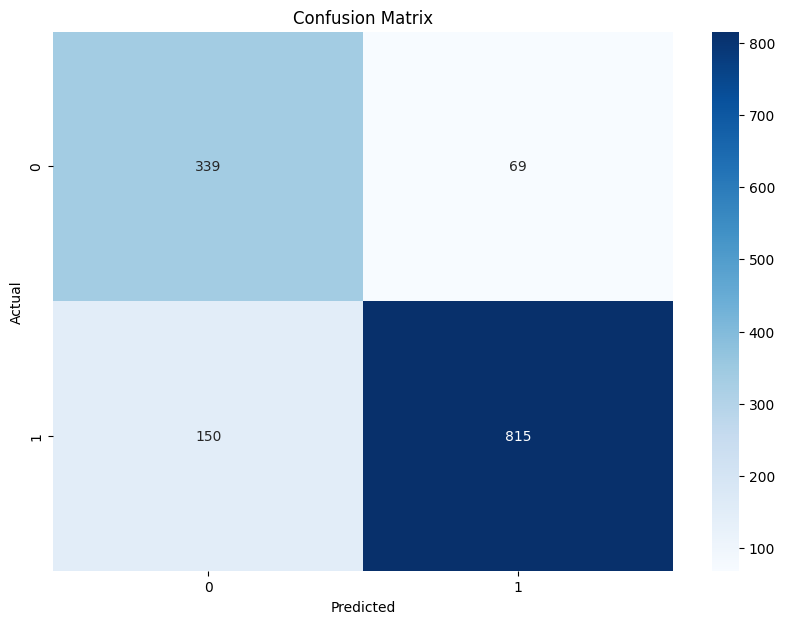

In [485]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay , accuracy_score, precision_score, recall_score

# Select relevant features and the target variable
features = ['PrimPropTypCalc', 'WN_Sit_Elc_Int1', 'WN_Sit_Gas_Int1', 'All_Water_Int1', 'GHG_Emiss_Int1']
target = 'Ener_Star_Score'

# Define the target variable and features
X = df_temp_normalized[features]
y = df_temp_normalized[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance
feature_importances = model.feature_importances_
for feature, importance in zip(features, feature_importances):
    print(f'Feature: {feature}, Importance: {importance}')


# Convert predictions and actual values to discrete classes
y_pred_class = y_pred.round().astype(int)
y_test_class = y_test.round().astype(int)

# Calculate accuracy, precision, and recall for each model
accuracy_dt = accuracy_score(y_test_class, y_pred_class)
precision_dt = precision_score(y_test_class, y_pred_class, average='weighted')
recall_dt = recall_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print()

# Generate the confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print('Confusion Matrix:')
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()